# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [18]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')

#  Summary statistics

Inspect the data.

In [19]:
##Visualize the dataset
# Initialization to plot figures (not used)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

data_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator = True).variable_labels()
data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012


In [20]:
data_labels

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [21]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [22]:
##tabulate college and union status
##You need to install tabulate for this section to run
from tabulate import tabulate
collgrad_union = data[["collgrad", "union"]]
#print(collgrad_union)
print(tabulate(collgrad_union, headers = ["index", "collgrad", "union"], tablefmt='grid'))

+---------+------------+---------+
|   index |   collgrad |   union |
+=========+============+=========+
|       0 |          0 |     nan |
+---------+------------+---------+
|       1 |          0 |     nan |
+---------+------------+---------+
|       2 |          0 |       1 |
+---------+------------+---------+
|       3 |          0 |     nan |
+---------+------------+---------+
|       4 |          0 |     nan |
+---------+------------+---------+
|       5 |          0 |       0 |
+---------+------------+---------+
|       6 |          0 |     nan |
+---------+------------+---------+
|       7 |          0 |       1 |
+---------+------------+---------+
|       8 |          0 |       1 |
+---------+------------+---------+
|       9 |          0 |       1 |
+---------+------------+---------+
|      10 |          0 |       1 |
+---------+------------+---------+
|      11 |          0 |       1 |
+---------+------------+---------+
|      12 |          0 |       0 |
+---------+---------

In [23]:
##generate a variable for log hours worked
y = np.log2(data['hours'])

<AxesSubplot:xlabel='year', ylabel='hours'>

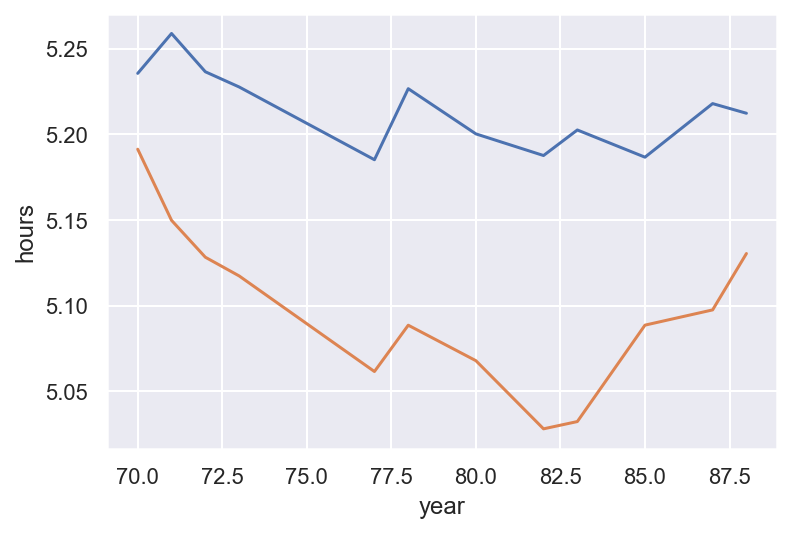

In [24]:
##plot log hours against year separately for union and non-union
import seaborn as sns
union_hours = data.query("union == 1")
non_union_hours = data.query("union == 0")
x = data['year']
sns.lineplot(data = union_hours, x = "year", y = np.log2(data['hours']), ci = None)
sns.lineplot(data = non_union_hours, x = "year", y = np.log2(data['hours']), ci = None)

# Regression: Effect of union status on hours worked

In [25]:
##Regress hours worked against union status and display the results
res = smf.ols("hours~union", data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           1.85e-31
Time:                        19:02:37   Log-Likelihood:                -70568.
No. Observations:               19202   AIC:                         1.411e+05
Df Residuals:                   19200   BIC:                         1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3112      0.079    461.166      0.000      36.157      36.466
union          1.9006      0.163     11.689      0.000       1.582       2.219
==============================================================================
Omnibus:                     4058.592   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22932.168
Skew:                          -0.900   Prob(JB):                         0.00
Kurtosis:                       8.042   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval
print("coef = 1.9006, std = 0.163, t-stat = 11.689, p-value = 0.000, confidence interval = [1.582,2.219]")

coef = 1.9006, std = 0.163, t-stat = 11.689, p-value = 0.000, confidence interval = [1.582,2.219]


#### What is the identification assumption for the coefficient on union to be causal?


As we saw in the linear regression (and could also be derived from the figures we produced above), the relation between hours worked and being in the union seems to be casual, and more specifically, being in the union increases the working hours by 1.9 times. This can be supported, by the summary of the regression, as P = 0 < 0.05, so the estimate is statistically significant and std error is small enough. Of course, we do not take into consideration, that confounders could exist, thus changing our results.


In [27]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res_grad = smf.ols("hours~union + collgrad", data=data).fit()
res_grad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     145.2
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.69e-63
Time:                        19:02:39   Log-Likelihood:                -70492.
No. Observations:               19202   AIC:                         1.410e+05
Df Residuals:                   19199   BIC:                         1.410e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9239      0.084    425.314      0.000      35.758      36.089
union          1.7661      0.162     10.880      0.000       1.448       2.084
collgrad       2.1420      0.173     12.353      0.000       1.802       2.482
==============================================================================
Omnibus:                     4212.730   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22770.233
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                       7.984   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from statsmodels.iolib.summary2 import summary_col
print(summary_col([res,res_grad]))


               hours I  hours II
--------------------------------
Intercept      36.3112  35.9239 
               (0.0787) (0.0845)
R-squared      0.0071   0.0149  
R-squared Adj. 0.0070   0.0148  
collgrad                2.1420  
                        (0.1734)
union          1.9006   1.7661  
               (0.1626) (0.1623)
Standard errors in parentheses.


##### We see that by including the variable collgrad, the union coefficent decreased a bit. This happened, because the hours worked are related also to if the person is a college graduate. So, the union coefficient was biased upward, which is normal, as college impacts both the hours worked and being in the union

In [29]:
## add occupation codes to the regression and compare the results with the previous one
res_occ = smf.ols("hours~union + occ_code", data=data).fit()
res_occ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     70.67
Date:                Mon, 11 Oct 2021   Prob (F-statistic):           2.65e-31
Time:                        19:02:41   Log-Likelihood:                -70290.
No. Observations:               19129   AIC:                         1.406e+05
Df Residuals:                   19126   BIC:                         1.406e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.5560      0.124    294.798      0.000      36.313      36.799
union          1.9686      0.166     11.885      0.000       1.644       2.293
occ_code      -0.0548      0.022     -2.485      0.013      -0.098      -0.012
==============================================================================
Omnibus:                     4013.155   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22869.646
Skew:                          -0.890   Prob(JB):                         0.00
Kurtosis:                       8.052   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(summary_col([res,res_grad, res_occ]))


               hours I  hours II hours III
------------------------------------------
Intercept      36.3112  35.9239  36.5560  
               (0.0787) (0.0845) (0.1240) 
R-squared      0.0071   0.0149   0.0073   
R-squared Adj. 0.0070   0.0148   0.0072   
collgrad                2.1420            
                        (0.1734)          
occ_code                         -0.0548  
                                 (0.0220) 
union          1.9006   1.7661   1.9686   
               (0.1626) (0.1623) (0.1656) 
Standard errors in parentheses.


##### This time, the union coefficient increased very slightly, although I would expect that occupation would have a large effect on the result

#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?
I would actually argue, that controlling for occupation is a good idea. Usually, controlling for mediators and colliders is a bad idea and can completely disrupt an analysis. But, in my opinion, occupation is a confounder, as being in a union and your hours, both depend on the kind o occupation you have. Actually, the above results make me question my estimate, as with what I stated above, I would assume that the union coeff would decrease and not increase...

#### What are "good controls" in the dataset in terms of being exogenous to union status?

Generally, controlling for confounders is the right thing to do. So, variables that influence both being in a union and working hours could be: age, ind_code, race, maybe tenure and probably others that I cannot distinguish.


In [31]:
##add these controls to the regression
res_good = smf.ols("hours~union + collgrad + age + ind_code + C(race) + tenure", data=data).fit()
res_good.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     160.8
Date:                Mon, 11 Oct 2021   Prob (F-statistic):          6.71e-232
Time:                        19:02:43   Log-Likelihood:                -68911.
No. Observations:               18891   AIC:                         1.378e+05
Df Residuals:                   18883   BIC:                         1.379e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           41.2705      0.391    105.550      0.000      40.504      42.037
C(race)[T.black]     1.5948      0.152     10.486      0.000       1.297       1.893
C(race)[T.other]     1.2834      0.650      1.976      0.048       0.010       2.557
union                1.0012      0.163      6.151      0.000       0.682       1.320
collgrad             3.0375      0.180     16.894      0.000       2.685       3.390
age                 -0.1582      0.012    -13.472      0.000      -0.181      -0.135
ind_code            -0.3040      0.023    -12.999      0.000      -0.350      -0.258
tenure               0.3916      0.018     22.086      0.000       0.357       0.426
==============================================================================
Omnibus:                     3590.839   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23724.899
Skew:                          -0.752   Prob(JB):                         0.00
Kurtosis:                       8.280   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### How do these change your estimates?
I initially estimated, that age would play a really important role in hours worked and being in a union. But, from what I can conclude, the variable that affects the outcome mostly is the collgrad. Of course, the union coefficient has decreased, which is normal, as we can see the effect of the other parameters on hours worked.

In [32]:
# Checking for Heteroskedasticity
res2 = smf.ols("hours~union", data=data).fit(cov_type='HC1')
res2.summary()
print(summary_col([res,res2]))


               hours I  hours II
--------------------------------
Intercept      36.3112  36.3112 
               (0.0787) (0.0828)
union          1.9006   1.9006  
               (0.1626) (0.1420)
R-squared      0.0071   0.0071  
R-squared Adj. 0.0070   0.0070  
Standard errors in parentheses.


# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[https://www.startribune.com/hennepin-county-sheriff-lax-marijuana-enforcement-is-bad/224151231/.
The main mistake of Rich Stanek (the person giving the speech), is the phrase "According to our most recent data, approximately 54 percent of males arrested for violent crime test positive for marijuana in Hennepin County". This implies a direct relation between crime and marihuana use, not considering all the other factors that attribute to crime. Living in a bad neighboorhood, low income, high stress e.t.c. are all factors which contribute both to the use of Marihuana and violence (confounders for our analysis). Thus, such a conclusion cannot be derived so easily. Actually, the relationship between violent crime and marijuana is not recognised, as different researchers, produce different results.
From all the above, it is obvious that the sherrif speaks for a correlation and not causation. Probably, people who commit crime are more likely to smoke marihuana, but that is as far as it goes]